## Reinforcement Learning

**What is reinforcement learning?**

Reinforcement learning (RL) is a general framework where agents learn to perform actions in an environment so as to maximize a reward ([Tensorflow](https://www.tensorflow.org/agents/tutorials/0_intro_rl#:~:text=Reinforcement%20learning%20(RL)%20is%20a%20general%20framework%20where%20agents%20learn%20to%20perform%20actions%20in%20an%20environment%20so%20as%20to%20maximize%20a%20reward)). In other words, it involves training an agent how to make decisions in an environment through interactions whereby it takes actions that gives the most rewards over time.

The goal for the agent is to figure out the best way to act in different situations to get the highest total reward possible. It keeps improving its decision-making strategy (policy) based on the rewards it receives. So, reinforcement learning is like a trial-and-error process where the agent learns the best actions to take to achieve the most favorable outcomes (`Chatgpt`)

**Agent**:   
The learner or decision-maker that interacts with the environment. An example is a self driving car.

**Environment**:  
Everything the agent interacts with. An example is the road where a self driving car operates and every element on that road.

**State**:   
A representation of the current situation of the environment. The state of the car relative to its environment.

**Action**:   
The set of all possible moves the agent can make. For example, steering the car left or right, accelerating or braking.

**Reward**:   
A feedback signal from the environment that evaluates the effectiveness of an action taken by the agent. Rewards can be positive or negative.

**Policy (π)**:   
A strategy used by the agent to decide the next action based on the current state. It can be deterministic (always choose the same action for a given state) or stochastic (choose an action based on a probability distribution). For example, if the car is approaching a red light, the policy might dictate that the car should slow down and stop.

**Value Function**:    
Estimates how good it is for the agent to be in a given state or how good an action is in a given state, in terms of future rewards. For instance, being in a state where the car is safely stopped at a red light is considered good because it avoids accidents and traffic violations.

**Q-Function (Q-Value)**:   
A specific type of value function that estimates the total reward an agent can expect to receive, starting from a state and taking an action. For example, the Q-function might help the car estimate that accelerating when the light turns green is good because it will lead to smooth traffic flow and positive rewards.

Reinforcement Learning comes with its own classic example - the Multi-Armed Bandit problem. Never heard? No worries! Here's what it is - assume you're at a casino and in a section with some slot machines. Let's say you're at a section with 10 slot machines in a row and it says "Play for free! Max payout is 10 dollars" Each slot machine is guaranteed to give you a reward between 0 and 10 dollars. Each slot machine has a different average payout, and you have to figure out which one gives the most average reward so that you can maximize your reward in the shortest time possible.

But why is it called the Multi-Armed Bandit problem? Think of the slot machine as a one-armed (single lever) bandit (because it generally steals your money!). Multiple slot machines, thus multi-armed bandit.
And if you're still wondering, this is what a slot machine looks like - [DataCamp](https://www.datacamp.com/tutorial/introduction-reinforcement-learning#:~:text=Reinforcement%20Learning%20comes,machine%20looks%20like%20%2D)

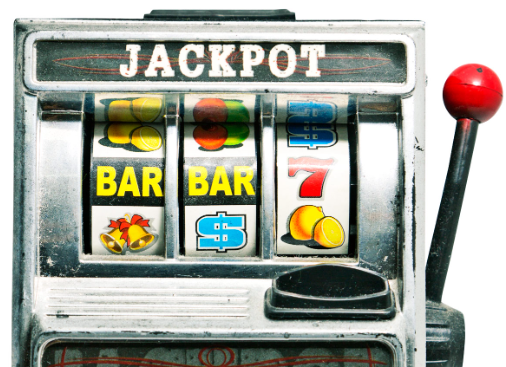

### Epsilon Greedy Algorithm
Step-by-Step Process:

1. Initialize Parameters:
  - Set the number of arms (slot machines) and the exploration probability ϵ.

2. Define Reward Function:
  - For each arm, simulate a reward based on its probability of success.

3. Initialize Memory:
  - Store actions and their corresponding rewards.

4. Select Actions:
   - With probability ϵ, select a random action (exploration).
   - Otherwise, select the best-known action based on past reward (exploitation).

5. Update Memory:
   - Record the action taken and its reward.

6. Calculate Running Mean:
   - Update the average reward over iterations.

7. Iterate:
   - Repeat the action selection and memory update steps for a set number of iterations.

In [1]:
# import libraries
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(5)

In [3]:
# Initialize the parameters
n = 10 # number of slot machine arms
arms = np.random.rand(n) # Initialize the true reward probabilities for each arm randomly
eps = 0.1 #probability of exploration action

In [24]:
# Simulate True Rewards
def reward(prob):
    reward = 0
    for i in range(10):
        prob_gen  = random.random()
        # print(f"Prob_gen: {prob_gen}")
        if prob_gen < prob:
            reward += 1
    return reward

In [6]:
arms[2]

0.20671915533942642

In [25]:
reward(arms[2])

2

In [19]:
#initialize memory array; has 1 row defaulted to random action index
av = np.array([np.random.randint(0,(n)), 0]).reshape(1,2) #av = action-value

In [20]:
av

array([[9, 0]])

In [22]:
#greedy method to select best arm based on memory array
def bestArm(a):
    bestArm = 0 #default to 0
    bestMean = 0
    for u in a:
        avg = np.mean(a[np.where(a[:, 0] == u[0])][:, 1]) #calculate mean reward for each action
    if bestMean < avg:
      bestMean = avg
      bestArm = u[0]
  return bestArm


Streaming output truncated to the last 5000 lines.


Eps Choice: 0.4652659898636128
Arm Choice: 3
Choice memory: [[3 9]]
Updated Memory: 
[[ 9  0]
 [ 0  0]
 [ 0  2]
 ...
 [ 3 10]
 [ 3 10]
 [ 3  9]]



Eps Choice: 0.2534851101502418
Arm Choice: 3
Choice memory: [[ 3 10]]
Updated Memory: 
[[ 9  0]
 [ 0  0]
 [ 0  2]
 ...
 [ 3 10]
 [ 3  9]
 [ 3 10]]



Eps Choice: 0.04225197875424225
Arm Choice: 8
Choice memory: [[8 3]]
Updated Memory: 
[[ 9  0]
 [ 0  0]
 [ 0  2]
 ...
 [ 3  9]
 [ 3 10]
 [ 8  3]]



Eps Choice: 0.2088677936272898
Arm Choice: 3
Choice memory: [[3 8]]
Updated Memory: 
[[ 9  0]
 [ 0  0]
 [ 0  2]
 ...
 [ 3 10]
 [ 8  3]
 [ 3  8]]



Eps Choice: 0.6088758968232391
Arm Choice: 3
Choice memory: [[3 9]]
Updated Memory: 
[[9 0]
 [0 0]
 [0 2]
 ...
 [8 3]
 [3 8]
 [3 9]]



Eps Choice: 0.6678870572794059
Arm Choice: 3
Choice memory: [[ 3 10]]
Updated Memory: 
[[ 9  0]
 [ 0  0]
 [ 0  2]
 ...
 [ 3  8]
 [ 3  9]
 [ 3 10]]



Eps Choice: 0.037419740893925635
Arm Choice: 3
Choice memory: [[ 3

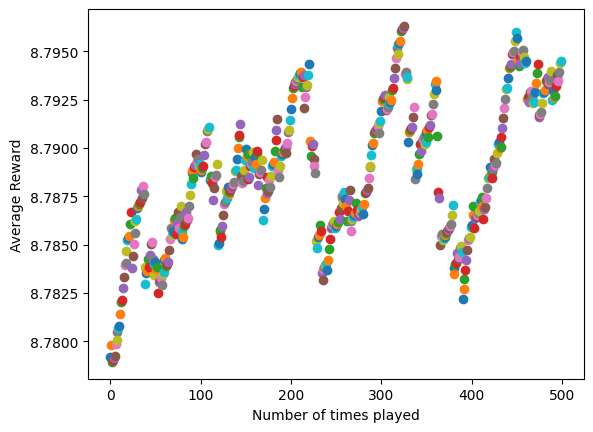

In [29]:
plt.xlabel("Number of times played")
plt.ylabel("Average Reward")
for i in range(500):
    eps_pred = random.random()
    print(f"Eps Choice: {eps_pred}")
    if eps_pred > eps: #greedy exploitation action
        choice = bestArm(av)
        print(f"Arm Choice: {choice}")
        thisAV = np.array([[choice, reward(arms[choice])]])
        print(f"Choice memory: {thisAV}")
        av = np.concatenate((av, thisAV), axis=0)
        print(f"Updated Memory: \n{av}")
        print("\n\n")
    else: #exploration action
        choice = np.where(arms == np.random.choice(arms))[0][0]
        print(f"Arm Choice: {choice}")
        thisAV = np.array([[choice, reward(arms[choice])]]) #choice, reward
        print(f"Choice memory: {thisAV}")
        av = np.concatenate((av, thisAV), axis=0) #add to our action-value memory array
        print(f"Updated Memory: \n{av}")
        print("\n\n")
    #calculate the mean reward
    runningMean = np.mean(av[:,1])
    print(runningMean)
    plt.scatter(i, runningMean)

**Agent**  
Who: The agent is represented by the code itself, making decisions on which slot machine to play.

**Actions**  
What: The actions are the choices of which slot machine (arm) to play.
choice = bestArm(av) for exploitation (choosing the best-known arm).
choice = np.where(arms == np.random.choice(arms))[0][0] for exploration (choosing a random arm).

**State**  
What: The state is implicitly represented by the knowledge of past actions and rewards stored in the array av.

**Reward**  
What: The reward is the outcome of playing a slot machine, determined by the reward function:
reward(arms[choice])

**Environment**  
What: The environment is the set of slot machines with their respective reward probabilities:
arms = np.random.rand(n)

**Policy**  
What: The policy is the strategy for choosing actions, balancing exploration and exploitation:
Exploitation: if random.random() > eps: choice = bestArm(av)
Exploration: else: choice = np.where(arms == np.random.choice(arms))[0][0]

**Value Function**  
What: The value function is implicitly represented by the average rewards stored in av:
Calculated using: np.mean(a[np.where(a[:,0] == u[0])][:, 1])

**Q-function**  
What: While not explicitly defined, the Q-function can be considered as the mean reward for each action:
np.mean(a[np.where(a[:,0] == u[0])][:, 1]) representing the estimated value of choosing a particular arm.


### Summary
Agent: The code making decisions.  
Actions: Choosing which slot machine to play.  
State: Knowledge of past actions and rewards.  
Reward: Outcome of playing a slot machine.  
Environment: Set of slot machines with probabilities.  
Policy: Strategy balancing exploration and exploitation.  
Value Function: Average rewards of actions.  
Q-function: Estimated value of actions based on rewards.  

This setup simulates how an agent learns to maximize rewards by balancing between trying new actions and exploiting known good actions.